# RANDOM FOREST CLASSIFIER USED TO IDENTIFTY HAND WRITTEN DIGIT  0-9

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

In [2]:
# LOADING DATSET

digit=load_digits()
dir(digit)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 432x288 with 0 Axes>

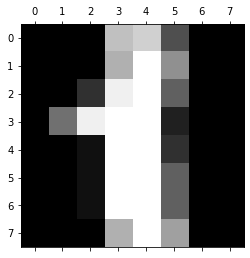

In [3]:
# PLOTTING IMAGE USING MULTIDIMENSIONAL ARRAY

plt.gray()
plt.matshow(digit.images[1])

In [4]:
# LOADING DATASET IN DATAFRAME WITH INDEPENDENT VARIABLE

df=pd.DataFrame(digit.data)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [5]:
# APPENDING DEPENDENT VARIABLE OR PREDICTION

df['target']=digit.target
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [6]:
# SPLITTING DATASET FOR TRAINIG AND TESTING PURPOSE

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('target',axis='columns'),df.target,test_size=0.3) 

In [7]:
len(x_train)

1257

In [8]:
len(x_test)

540

In [9]:
# IMPORTING RANDOM FOREST CLASSIFIER AND FITTING ON MODEL


from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=80)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=80)

In [10]:
# MODEL ACCURACY

model.score(x_test,y_test)*100

97.4074074074074

## confusion matrix to show where model is not working good

In [11]:
y_predict=model.predict(x_test)

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_predict)
cm

array([[63,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 55,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 57,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  1,  0,  2,  1,  0],
       [ 0,  0,  0,  0, 48,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 47,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 49,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 60,  0,  1],
       [ 0,  1,  3,  0,  0,  1,  0,  1, 51,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  0, 54]], dtype=int64)

## To visualize confusion matrix more accurately using seaborn to plot heatmap

Text(69.0, 0.5, 'TRUTH')

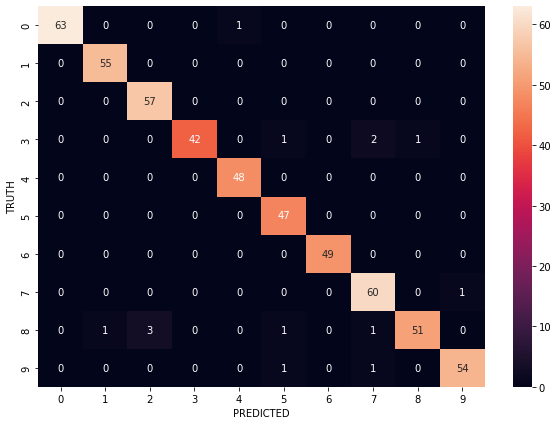

In [12]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("PREDICTED")
plt.ylabel("TRUTH")